## usando PIL/PILLOW

Essas são as principais bibliotecas de python para manipular imagens.

PILLOW é um fork¹ do PIL, feito por este ter tido seu desenvolvimento abandonado a bastante tempo

¹ ~> *fork* : uma "cópia" que foi seguindo seu desenvolvimento de forma independente

In [1]:
# importando as bibliotecas usadas nos exemplos
from PIL import Image
from random import randint

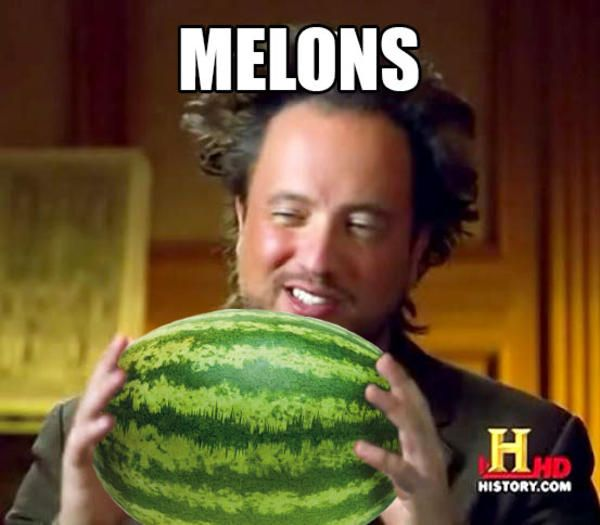

In [2]:
meme = Image.open("melons.jpg") # abrindo a imagem
meme

## Como é um pixel?

In [3]:
size = meme.size
print("size:", size)

X, Y = randint(0,size[0]), randint(0,size[1]) # posições aleatórias na imagem
print("X: {0}, Y: {1}".format(X, Y))

coordenada = X, Y
red, green, blue = meme.getpixel(coordenada) #!! aqui a coordenada tem de ser uma tupla !!
print("red: {0}, green: {1}, blue: {2}".format(red, green, blue))

size: (600, 525)
x: 131, y: 418
red: 35, green: 50, blue: 21


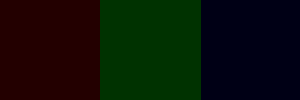

In [4]:
pixel = Image.new(size=(300, 100), mode="RGB") # ceiando uma nova imagem para ver o pixel selecionado
for x in range(300):
    for y in range(100):
        if x < 100:
            pixel.putpixel((x, y), (red, 0, 0))  # putpixel( coordenada , valores_do_pixel)
        elif x > 200:
            pixel.putpixel((x, y), (0, 0, blue))
        else:
            pixel.putpixel((x, y), (0, green, 0))
        
pixel

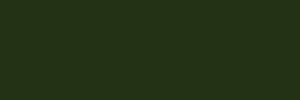

In [5]:
cor = Image.new(size=(300, 100), mode="RGB")
for x in range(300):
    for y in range(100):
        pixel.putpixel((x, y), (red, green, blue))
        
pixel

Um pixel se compõe de um grupo de 3 cores: vermelho, verde e azul (ocasionalmente há outra "cor" chamada *alpha* que serve para indicar o nível de transparência/opacidade em formatos que suportam este recurso)

Cada cor tem valores inteiros que correspondem a 1 byte (8 bits, ou seja, um conjunto de 8 "zeros e uns"), sendo assim eles indicam a intensidade de cada cor, do mais escuro (`00000000`) ao mais intenso (`11111111`), mas para facilitar as coisas usamos números inteiros que representam esses binários:

valores possíveis num binário = **2** (0 e 1)

quantidade de valores num byte = **8**

$2^8 = 256$ possibilidades

Obs.: como em python se começa a contar do 0, então os valores possíveis vão de 0 a 256

>Então imagens escuras demandam um consumo menor de energia para exibição do que cores claras ~> pense nisso quando for escolher o papel de parede do celular

# Com o Matplotlib

o matplotlib é a principal biblioteca para visualização de dados em python, indo bem além de apenas fazer gráficos.

neste exemplo, mostrando como pode ler e exibir imagens

In [6]:
import matplotlib.pyplot as plt   # para plotar as imagens
import matplotlib.image as mpimg  # para ler imagens
import numpy as np # internamente o matplotlib usa essa biblioteca

In [7]:
image = mpimg.imread("melons.jpg") # lendo a imagem
image # o que é retornado é um array do numpy, na verdade uma matriz de pixels

array([[[57, 28, 14],
        [57, 28, 14],
        [57, 28, 14],
        ...,
        [38,  0, 11],
        [38,  0, 11],
        [38,  0, 11]],

       [[57, 28, 14],
        [57, 28, 14],
        [57, 28, 14],
        ...,
        [38,  0, 11],
        [38,  0, 11],
        [38,  0, 11]],

       [[57, 28, 14],
        [57, 28, 14],
        [57, 28, 14],
        ...,
        [38,  0, 11],
        [38,  0, 11],
        [38,  0, 11]],

       ...,

       [[37,  2,  9],
        [38,  5, 12],
        [43, 12, 17],
        ...,
        [ 0,  1,  5],
        [ 0,  1,  5],
        [ 0,  1,  3]],

       [[36,  1,  8],
        [36,  3, 10],
        [41,  9, 14],
        ...,
        [ 0,  1,  6],
        [ 0,  1,  5],
        [ 0,  1,  3]],

       [[35,  0,  7],
        [35,  2,  9],
        [40,  7, 14],
        ...,
        [ 0,  1,  6],
        [ 0,  1,  5],
        [ 0,  1,  5]]], dtype=uint8)

Há várias vantagens no uso do matplotlib + numpy para ler e manipular imagens, algumas são:

* acesso mais direto ao valor de cada pixel
* o numpy tem tipos próprios para números (veja acima o `dtype=uint8`), isso significa menor espaço ocupado na RAM e uint8 significa: números inteiros positivos de até 8 bits, ou seja, exatamente o tamanho cenessário
*  é fácil fazer operações em todos os valores do array sem nem mesmo precisar fazer um `for`, tornando o código mais limpo e simplificando o trabalho de criar filtros ou manipular imagens

In [12]:
image[Y, X] # há diferenças na forma que indicamos uma coordenada no array do numpy ou num objeto do Pillow

array([35, 50, 21], dtype=uint8)

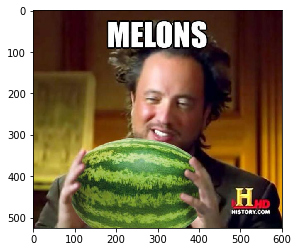

In [9]:
plt.imshow(image) # imshow = image show

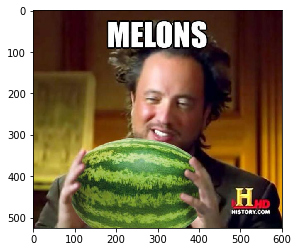

In [10]:
plt.imshow(meme) # funciona tanto com arrays do numpy quanto com objetos do Pilow

repare que usando o `imshow` há uma "régua" indicando o índice que representa a posição dos pixels.